# Unit 5 - Financial Planning

In [54]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [55]:
from dotenv import load_dotenv

dotenv_path = '../c/Desktop/my_gitrepos/APIs-Financial-analysis/.env'
load_dotenv(dotenv_path)

# Now you can access your environment variables as follows:
api_key = os.getenv('APCA_API_KEY_ID')
secret_key = os.getenv('APCA_API_SECRET_KEY')


In [56]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [57]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [58]:
# Set current amount of crypto assets

my_btc = 1.2
my_eth = 5.3

btc_price = requests.get(btc_url)
eth_price = requests.get(eth_url)

In [59]:
import json

btc_data_json = btc_price.json()

eth_data_json = eth_price.json()


In [60]:
# Fetch current BTC price
BTC_price = btc_data_json['data']['1']['quotes']['CAD']['price']

# Fetch current ETH price
ETH_price = eth_data_json['data']['1027']['quotes']['CAD']['price']

# Compute current value of my crypto

my_btc_value = my_btc * BTC_price
my_eth_value = my_eth * ETH_price
crypto = my_btc_value + my_eth_value
# Print current crypto wallet balance
print(f"The current value of my {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of my {my_eth} ETH is ${my_eth_value:0.2f}")
print(f"The total value of my crypto assets is ${crypto:0.2f}")

The current value of my 1.2 BTC is $45402.70
The current value of my 5.3 ETH is $12702.54
The total value of my crypto assets is $58105.24


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [61]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [62]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv('ALPACA_API_KEY')
alpaca_secret_key = os.getenv('ALPACA_SECRET_KEY')

# Create the Alpaca API object
alpaca_object = tradeapi.REST( alpaca_api_key, alpaca_secret_key,api_version='v2')

In [63]:
# Format current date as ISO format
today = pd.Timestamp("2023-03-24", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
spy_agg_closing = alpaca_object.get_bars(tickers, timeframe, start = today,end = today).df
spy_agg_closing

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2023-03-24 04:00:00+00:00,100.280,100.49,99.95,100.16,6203977,23905,100.145648,AGG
2023-03-24 04:00:00+00:00,391.841,395.84,389.40,395.75,107053295,801995,393.110712,SPY


In [64]:
# Reorganize the DataFrame

# Separate ticker data

AGG = spy_agg_closing[spy_agg_closing['symbol']=='AGG'].drop('symbol', axis=1)
SPY = spy_agg_closing[spy_agg_closing['symbol']=='SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
spy_agg_portfolio = pd.concat([AGG, SPY],axis=1, keys=['AGG','SPY'])

# Preview DataFrame
spy_agg_portfolio

AGG                                              \
                             open    high    low   close   volume trade_count   
timestamp                                                                       
2023-03-24 04:00:00+00:00  100.28  100.49  99.95  100.16  6203977       23905   

                                           SPY                         \
                                 vwap     open    high    low   close   
timestamp                                                               
2023-03-24 04:00:00+00:00  100.145648  391.841  395.84  389.4  395.75   

                                                              
                              volume trade_count        vwap  
timestamp                                                     
2023-03-24 04:00:00+00:00  107053295      801995  393.110712

In [65]:
# Pick AGG and SPY close prices
agg_close_price = pd.DataFrame()
spy_close_price = pd.DataFrame()

# YOUR CODE HERE!
agg_close_price = spy_agg_portfolio["AGG"]["close"]
spy_close_price = spy_agg_portfolio["SPY"]["close"]

agg_close_price.index = agg_close_price.index.date
spy_close_price.index = spy_close_price.index.date

# Print AGG and SPY close prices

print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $2023-03-24    100.16
Name: close, dtype: float64
Current SPY closing price: $2023-03-24    395.75
Name: close, dtype: float64


In [66]:
# Compute the current value of shares

my_agg_value = sum(my_agg * agg_close_price)
my_spy_value = sum(my_spy * spy_close_price)
shares = my_agg_value + my_spy_value

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")
print(f"The total value of my stocks and bonds portfolio is ${shares:0.2f}")

The current value of your 50 SPY shares is $19787.50
The current value of your 200 AGG shares is $20032.00
The total value of my stocks and bonds portfolio is $39819.50


### Savings Health Analysis

In [67]:
# Set monthly household income
monthly_income = 1200

# Consolidate financial assets data
crypto_assets_rounded = round(crypto, 2)
shares_assets_rounded = round(shares, 2)

# Create savings DataFrame
df_savings = pd.DataFrame({'amount': [crypto_assets_rounded, shares_assets_rounded]}, index=['crypto', 'shares'])

display(df_savings)

,amount
crypto,58105.24
shares,39819.50


array([<AxesSubplot:ylabel='amount'>], dtype=object)

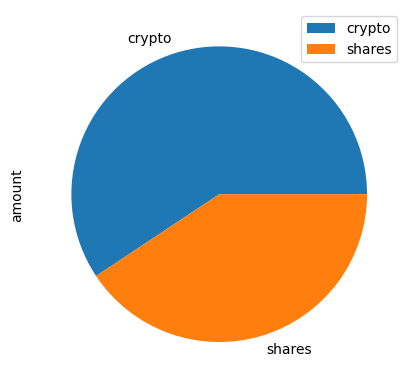

In [68]:
# Plot savings pie chart
df_savings.plot(kind='pie', subplots=True)

In [69]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = crypto + shares

# Validate saving health

if total_savings > emergency_fund:
    print("Congratulations! You have enough money in your emergency fund.")
elif total_savings == emergency_fund:
    print("Congratulations! You have reached your financial goal of having enough money in your emergency fund.")
else:
    difference = emergency_fund - total_savings
    print("You are", difference, "dollars away from reaching your financial goal of having enough money in your emergency fund.")

Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [70]:
# Set start and end dates of five years back from today.
timeframe = "1Day"
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2018-03-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2023-03-01', tz='America/New_York').isoformat()

In [71]:
# Get 5 years' worth of historical data for SPY and AGG
spy_agg_years = alpaca_object.get_bars(tickers,timeframe,start=start_date, end=end_date).df

# Reorganize the DataFrame

# Separate ticker data
AGG_years = spy_agg_years[spy_agg_years['symbol']=='AGG'].drop('symbol', axis=1)
SPY_years = spy_agg_years[spy_agg_years['symbol']=='SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
spy_agg_years = pd.concat([AGG_years, SPY_years],axis=1, keys=['AGG','SPY'])

# Display sample data
spy_agg_years.head()

AGG                                      \
                             open      high      low   close   volume   
timestamp                                                               
2018-03-01 05:00:00+00:00  106.54  106.7200  106.381  106.63  7335507   
2018-03-02 05:00:00+00:00  106.47  106.5498  106.360  106.46  3717422   
2018-03-05 05:00:00+00:00  106.60  106.6500  106.280  106.40  3307229   
2018-03-06 05:00:00+00:00  106.45  106.5600  106.380  106.42  1932355   
2018-03-07 05:00:00+00:00  106.51  106.5500  106.370  106.40  3448700   

                                                      SPY                  \
                          trade_count        vwap    open    high     low   
timestamp                                                                   
2018-03-01 05:00:00+00:00       28725  106.548687  271.41  273.17  266.00   
2018-03-02 05:00:00+00:00       12438  106.445356  265.80  269.72  264.82   
2018-03-05 05:00:00+00:00       14538  106.414498  267.73  272.89  267.61   
2018-03-06 05:00:00+00:00        8977  106.459567  273.30  273.39  271.18   
2018-03-07 05:00:00+00:00       11732  106.485283  270.42  273.18  270.20   

                                                                      
                            close     volume trade_count        vwap  
timestamp                                                             
2018-03-01 05:00:00+00:00  267.72  177337246      620289  269.283987  
2018-03-02 05:00:00+00:00  269.10  139253517      540421  267.536976  
2018-03-05 05:00:00+00:00  272.12   97475612      356242  270.821597  
2018-03-06 05:00:00+00:00  272.83   79224141      295498  272.286640  
2018-03-07 05:00:00+00:00  272.83   87987792      318137  271.917262

In [72]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_AGG_SPY = MCSimulation(portfolio_data = spy_agg_years,weights = [.40,.60],num_simulation = 500,num_trading_days = 252*30)

In [73]:
# Printing the simulation input data
MC_AGG_SPY.portfolio_data.head()

AGG                                      \
                             open      high      low   close   volume   
timestamp                                                               
2018-03-01 05:00:00+00:00  106.54  106.7200  106.381  106.63  7335507   
2018-03-02 05:00:00+00:00  106.47  106.5498  106.360  106.46  3717422   
2018-03-05 05:00:00+00:00  106.60  106.6500  106.280  106.40  3307229   
2018-03-06 05:00:00+00:00  106.45  106.5600  106.380  106.42  1932355   
2018-03-07 05:00:00+00:00  106.51  106.5500  106.370  106.40  3448700   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2018-03-01 05:00:00+00:00       28725  106.548687          NaN  271.41   
2018-03-02 05:00:00+00:00       12438  106.445356    -0.001594  265.80   
2018-03-05 05:00:00+00:00       14538  106.414498    -0.000564  267.73   
2018-03-06 05:00:00+00:00        8977  106.459567     0.000188  273.30   
2018-03-07 05:00:00+00:00       11732  106.485283    -0.000188  270.42   

                                                                          \
                             high     low   close     volume trade_count   
timestamp                                                                  
2018-03-01 05:00:00+00:00  273.17  266.00  267.72  177337246      620289   
2018-03-02 05:00:00+00:00  269.72  264.82  269.10  139253517      540421   
2018-03-05 05:00:00+00:00  272.89  267.61  272.12   97475612      356242   
2018-03-06 05:00:00+00:00  273.39  271.18  272.83   79224141      295498   
2018-03-07 05:00:00+00:00  273.18  270.20  272.83   87987792      318137   

                                                    
                                 vwap daily_return  
timestamp                                           
2018-03-01 05:00:00+00:00  269.283987          NaN  
2018-03-02 05:00:00+00:00  267.536976     0.005155  
2018-03-05 05:00:00+00:00  270.821597     0.011223  
2018-03-06 05:00:00+00:00  272.286640     0.002609  
2018-03-07 05:00:00+00:00  271.917262     0.000000

In [74]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_AGG_SPY.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.990543,0.999047,0.995560,1.005125,0.994356,0.994824,0.993992,1.004113,0.995834,1.000080,...,1.005139,0.993686,1.002002,1.017841,1.002159,0.991629,0.996994,0.998173,0.995025,0.994644
2,0.989161,0.995577,0.998460,1.014868,0.984221,0.993324,0.985507,0.998676,0.999694,1.005332,...,1.005348,0.993646,1.002506,1.017597,0.996920,0.992736,0.986429,0.993482,0.991285,1.009481
3,0.994121,0.997568,0.988478,1.031706,0.992708,1.004414,0.986505,1.000626,1.005399,1.012213,...,1.010270,0.993989,1.008366,1.004258,1.004254,0.999933,0.994400,1.008587,0.978499,1.020747
4,0.991581,0.995479,0.987207,1.039529,0.994786,1.010788,0.980715,0.983149,1.009398,1.000301,...,1.015404,1.004260,1.006110,0.993776,1.014298,0.995288,0.998597,1.015390,0.991087,1.030054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,5.160811,5.727809,2.270382,3.126243,3.230855,7.411331,4.390265,2.080159,8.126297,2.236727,...,6.200497,10.399306,4.519402,1.324803,3.777299,8.668753,0.750699,6.910632,3.025889,1.854067
7557,5.222260,5.692093,2.278927,3.134601,3.170819,7.400346,4.396245,2.082536,8.140836,2.216755,...,6.175213,10.388117,4.567752,1.330581,3.792992,8.670024,0.754184,6.894979,3.018779,1.867980
7558,5.221098,5.688873,2.298548,3.141684,3.177199,7.474084,4.442323,2.095691,8.138531,2.224961,...,6.232893,10.314361,4.500322,1.332088,3.849934,8.560184,0.761447,7.001697,3.004782,1.852625
7559,5.219458,5.741112,2.284943,3.172064,3.171720,7.392607,4.438727,2.110833,8.175624,2.239008,...,6.274342,10.243449,4.529653,1.355846,3.829336,8.650630,0.747804,6.938959,3.008673,1.871167


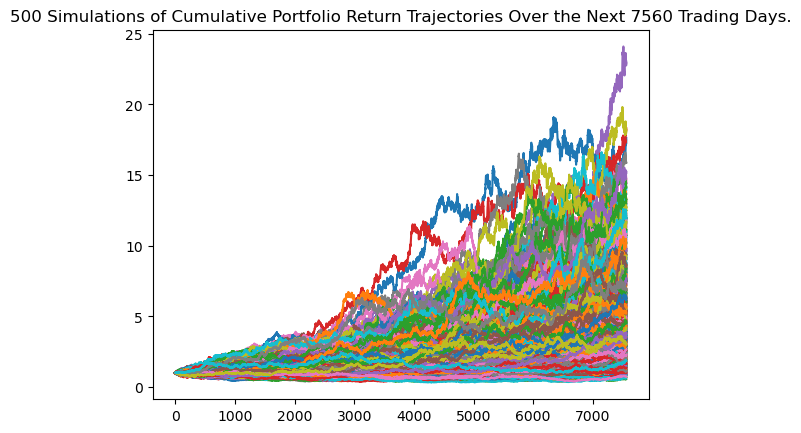

In [76]:
# Plot simulation outcomes
simulation_line_plot = MC_AGG_SPY.plot_simulation()

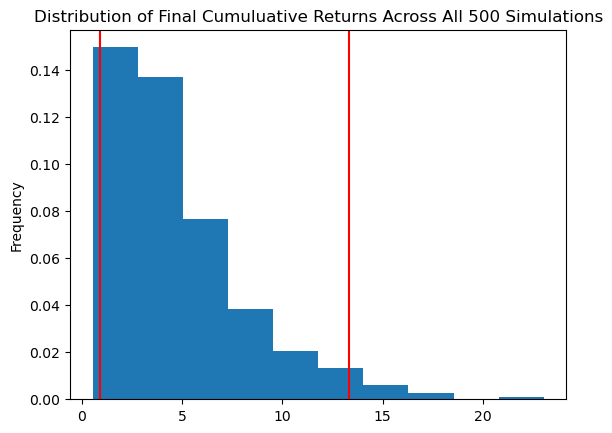

In [77]:
# Plot probability distribution and confidence intervals
distribution_plot = MC_AGG_SPY.plot_distribution()

### Retirement Analysis

In [78]:
# Fetch summary statistics from the Monte Carlo simulation results
sum_stats = MC_AGG_SPY.summarize_cumulative_return()

# Print summary statistics
print(sum_stats)

count           500.000000
mean              4.746365
std               3.356958
min               0.559920
25%               2.443377
50%               3.829458
75%               6.017133
max              23.029122
95% CI Lower      0.928694
95% CI Upper     13.306264
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [79]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000

ci_lower = round(sum_stats[8]*20000,2)
ci_upper = round(sum_stats[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $18573.88 and $266125.27


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [80]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(sum_stats[8]*20000,2)
ci_upper = round(sum_stats[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $18573.88 and $266125.27


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [81]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_AGG_SPY_five= MCSimulation(portfolio_data = spy_agg_years,weights = [.40,.60],num_simulation = 500,num_trading_days = 252*5)

In [82]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_AGG_SPY_five.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.998387,1.001996,0.994394,0.999324,0.990692,1.000352,0.994536,1.014637,1.010537,1.008011,...,1.002984,0.985830,1.012800,1.005090,1.021960,1.005306,0.992539,1.001626,1.004995,1.000423
2,0.997722,1.005714,1.000388,0.998831,0.972096,1.010620,0.993179,1.003519,1.020123,1.016483,...,0.999663,0.980507,1.017861,1.005286,1.025208,1.013819,0.990526,1.000340,0.999597,1.003517
3,0.973360,1.002198,1.008263,0.980950,0.964374,1.001325,1.000638,0.980870,1.027201,1.017564,...,1.004977,0.980760,1.004355,1.009073,1.030629,1.023427,0.989385,0.999673,0.997855,1.007564
4,0.977070,0.995210,1.008235,0.983373,0.959487,0.994755,1.008356,0.984009,1.012366,1.017597,...,1.020813,0.967296,1.006075,1.005934,1.031027,1.023121,0.988935,0.995021,0.989492,1.009197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,0.887592,1.716937,1.073514,1.082224,0.929379,1.954045,1.914995,0.969903,1.636222,1.429008,...,1.124881,0.946929,0.936698,0.923451,0.800358,1.727657,1.593327,1.150791,1.318553,1.865816
1257,0.886767,1.735151,1.075623,1.083516,0.933214,1.923560,1.915009,0.973830,1.619567,1.410492,...,1.125405,0.943820,0.933373,0.921579,0.791755,1.730143,1.577378,1.130280,1.328748,1.880118
1258,0.885018,1.746318,1.081385,1.091220,0.939667,1.916701,1.929376,0.958736,1.617685,1.392730,...,1.116702,0.936204,0.937934,0.921589,0.789610,1.739700,1.552358,1.130837,1.329674,1.896165
1259,0.877551,1.758975,1.067791,1.092025,0.942549,1.936171,1.943671,0.955152,1.614588,1.406556,...,1.110557,0.935025,0.939270,0.917089,0.788265,1.726586,1.522002,1.136966,1.332902,1.901237


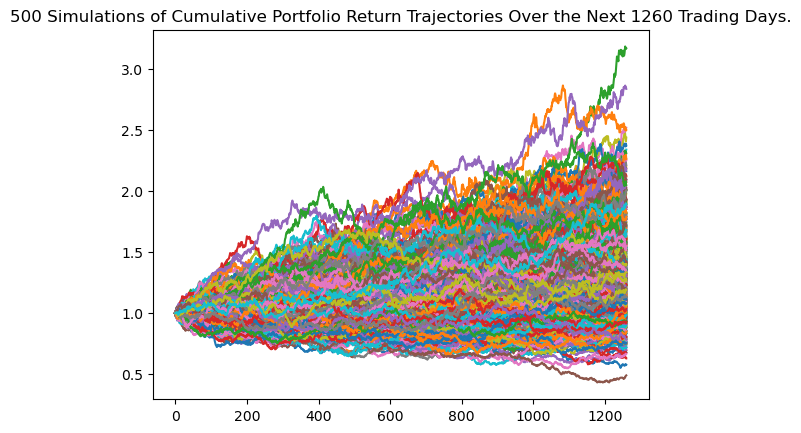

In [83]:
# Plot simulation outcomes
simulation_line_plot_five = MC_AGG_SPY_five.plot_simulation()

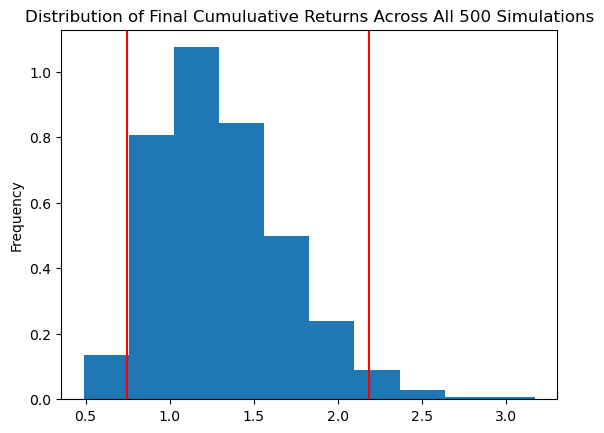

In [84]:
# Plot probability distribution and confidence intervals
distribution_plot_five = MC_AGG_SPY_five.plot_distribution()

In [85]:
# Fetch summary statistics from the Monte Carlo simulation results
sum_stats_five = MC_AGG_SPY_five.summarize_cumulative_return()

# Print summary statistics
print(sum_stats_five)

count           500.000000
mean              1.314791
std               0.384734
min               0.490280
25%               1.025712
50%               1.265925
75%               1.540098
max               3.171328
95% CI Lower      0.746116
95% CI Upper      2.186101
Name: 1260, dtype: float64


In [86]:
# Set initial investment
initial_investment = 15000
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(sum_stats_five[8]*15000,2)
ci_upper_five = round(sum_stats_five[9]*15000,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $15000 in the portfolio over the next 5 years will end within in the range of $11191.74 and $32791.52


### Ten Years Retirement Option

In [87]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_AGG_SPY_ten= MCSimulation(portfolio_data = spy_agg_years,weights = [.40,.60],num_simulation = 500,num_trading_days = 252*10)

In [88]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_AGG_SPY_ten.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.006740,0.996481,0.995501,1.002126,0.997302,0.993261,1.005160,0.999995,1.005797,1.011914,...,0.991306,0.991627,1.001618,1.008038,0.998016,1.004333,1.000751,0.992657,1.002711,0.992462
2,1.017272,1.013545,0.988837,1.003319,1.000691,1.003954,1.003540,1.016677,1.002247,1.005122,...,1.002011,0.977249,0.977998,1.020316,1.003455,0.992744,0.990794,0.992343,1.012738,0.998752
3,1.020963,1.015838,0.997841,0.982892,1.005557,1.003832,0.998819,1.012151,1.009533,1.012913,...,0.982977,0.969815,0.978309,1.028576,1.001191,0.989339,0.985076,1.015116,1.006198,1.001110
4,1.010593,1.022033,0.990183,0.977263,0.997031,1.001837,0.997509,1.005147,0.998464,1.012580,...,0.982758,0.975133,0.981297,1.034092,1.009430,0.980496,0.984691,1.019227,0.996908,0.985524
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.681318,1.263408,1.600157,1.731157,1.579004,1.008184,3.134217,2.328388,1.408845,1.148222,...,1.279860,1.012709,1.111473,1.939551,1.950074,4.219383,1.609315,1.702882,2.535640,4.125320
2517,1.664000,1.279906,1.606530,1.708747,1.582328,1.016939,3.050580,2.311075,1.415621,1.139485,...,1.283990,1.015696,1.123435,1.924550,1.935861,4.239769,1.617369,1.720291,2.521032,4.105159
2518,1.647789,1.284818,1.591755,1.697264,1.581908,0.999061,3.054075,2.313614,1.417892,1.132501,...,1.278351,1.015604,1.104017,1.915594,1.919419,4.269084,1.626628,1.694988,2.525033,4.113772
2519,1.653250,1.306616,1.613074,1.713043,1.571455,0.997792,3.011180,2.321235,1.424107,1.154089,...,1.269691,1.021158,1.098807,1.914543,1.916699,4.311098,1.637121,1.688870,2.560343,4.067234


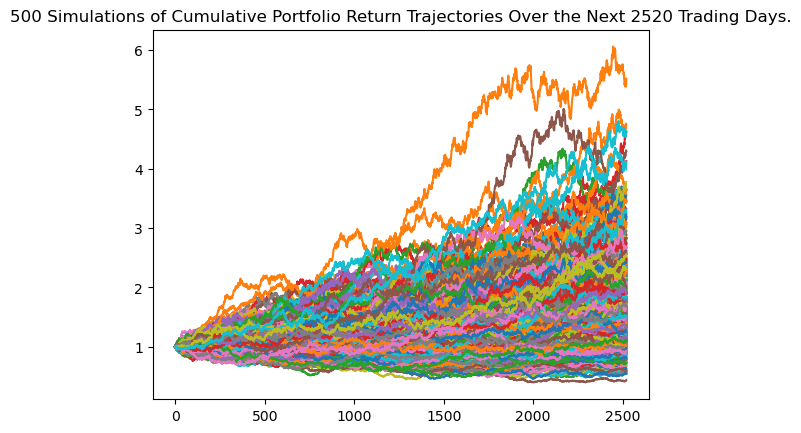

In [89]:
# Plot simulation outcomes
simulation_line_plot_ten = MC_AGG_SPY_ten.plot_simulation()

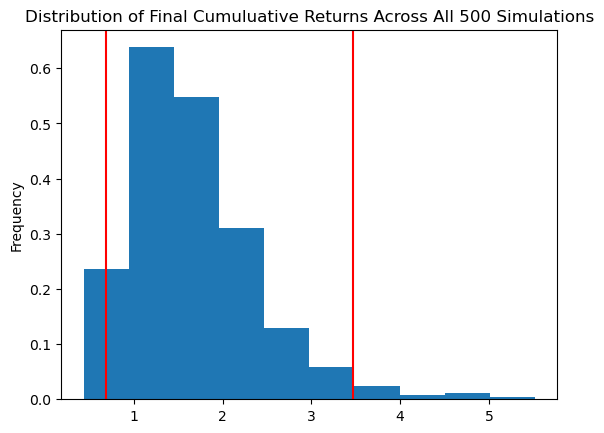

In [90]:
# Plot probability distribution and confidence intervals
distribution_plot_ten = MC_AGG_SPY_ten.plot_distribution()

In [91]:
# Fetch summary statistics from the Monte Carlo simulation results
sum_stats_ten = MC_AGG_SPY_ten.summarize_cumulative_return()

# Print summary statistics
print(sum_stats_ten)

count           500.000000
mean              1.670544
std               0.732242
min               0.438604
25%               1.124878
50%               1.562778
75%               2.030334
max               5.517560
95% CI Lower      0.681456
95% CI Upper      3.468992
Name: 2520, dtype: float64


In [92]:
# Set initial investment
initial_invesment= 20000
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(sum_stats_five[8]*20000,2)
ci_upper_ten = round(sum_stats_five[9]*20000,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $15000 in the portfolio over the next 10 years will end within in the range of $14922.33 and $43722.03
